**Exploratory Data Analysis**

**Roles To Explore:**

In [1]:
#importing libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
from matplotlib import pyplot as plt
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['month_name']=df['job_posted_date'].dt.month_name()
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

**Filter For US Data Analyst Roles:**

In [2]:
df_US = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')]
df_US.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month_name
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,November
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}",March


**Top Job Locations in US**

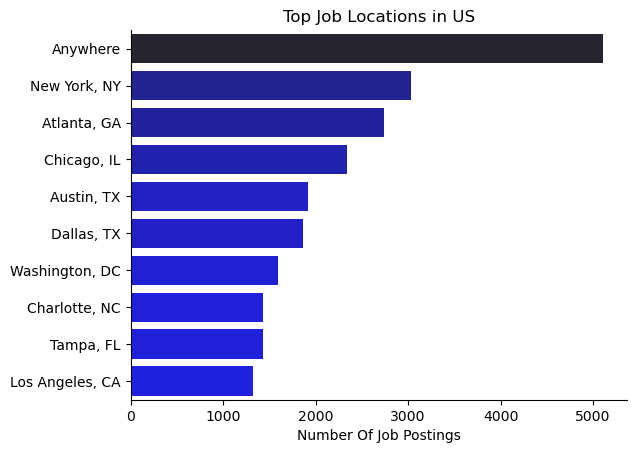

In [3]:
top_locations_US=df_US['job_location'].value_counts().head(10).reset_index(name='count')
sns.barplot(data=top_locations_US, x='count', y='job_location',hue='count', palette='dark:b_r',legend=False)
plt.title('Top Job Locations in US')
plt.xlabel('Number Of Job Postings')
plt.ylabel('')
sns.despine()  # Removes the outer borderline

**Top Companies In US For Data Analyst**

In [4]:
top_company=df_US['company_name'].value_counts().head(10).reset_index(name='count')
top_company

,company_name,count
0,Robert Half,959
1,Insight Global,827
2,Dice,584
3,UnitedHealth Group,507
4,Get It Recruit - Information Technology,503
5,Citi,477
6,Corporate,416
7,SynergisticIT,374
8,Centene Corporation,350
9,Booz Allen Hamilton,315


Text(0, 0.5, '')

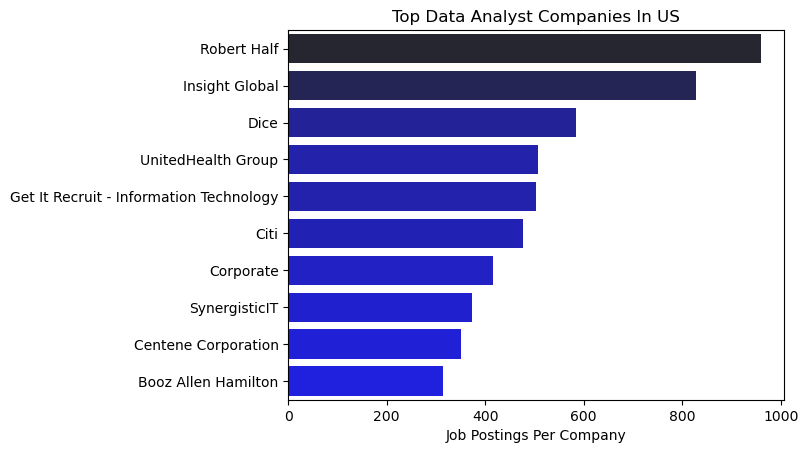

In [5]:
sns.barplot(data=top_company, x='count', y='company_name',hue='count',palette='dark:b_r',legend=False)
plt.title('Top Data Analyst Companies In US')
plt.xlabel('Job Postings Per Company')
plt.ylabel('')

**Other Important Introductory Charts**

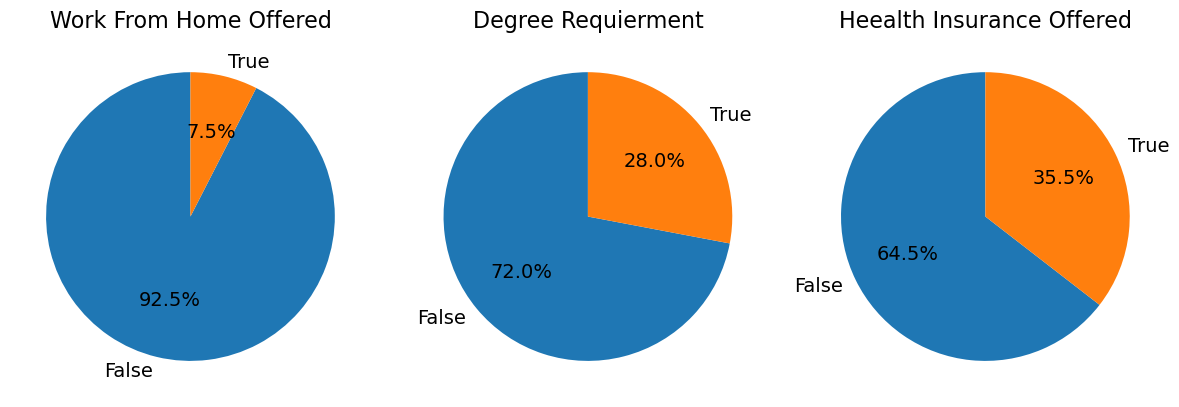

In [6]:
dict_col={
    'job_work_from_home':'Work From Home Offered',
    'job_no_degree_mention':'Degree Requierment',
    'job_health_insurance':'Heealth Insurance Offered'
}
fig , ax =plt.subplots(1,3, figsize=(12, 4))
for i, (col,title) in enumerate(dict_col.items()):
    df_US[col].value_counts().plot(kind='pie',ax=ax[i],autopct='%1.1f%%', fontsize=14, labels=['False','True'], startangle=90)
    ax[i].set_title(title, fontsize=16)
    ax[i].set_ylabel("")
fig.tight_layout()